# Most powerful tests and $p$-values
## Power of a test
- We are looking for a good way to test for hypothesis $H_0:\theta\in\Theta_0$ vs. $H_1:\theta\in\Theta_0^c$
- Want probability of Type I Error to be small
    - Rejecting a true null hypothesis
- For many methods (e.g. LRT) we can control the probability of Type I Error
    - A level $\alpha$ test has Type I Error at most $\alpha$ for all $\theta\in\Theta_0$
- Also want probability of Type II Error to be small
    - power of a test = 1 - prob. of Type II Error
- In the class of *level $\alpha$ tests*, can we find the one with the smallest Type II Error probabilities?
    - I.e. the level $\alpha$ test with *maximum power* for all $\theta\in\Theta_0^c$

**Hypothesis: $H_0:\theta\in\Theta_0$ vs. $\theta\in\Theta_0^c$**

**Test Procedure: Reject $H_0$ iff $\mathbf{X}\in R$**

**Power function: $\beta(\theta)=P(\text{Reject } H_0)=P_\theta(\mathbf{X}\in R)$**

- Want $\beta(\theta)$ to be small for $\theta\in\Theta_0$
- Want $\beta(\theta)$ to be large for $\theta\in\Theta_0^c$

Size of a test: $\alpha=\sup_{\theta\in\Theta_0}\beta(\theta)$

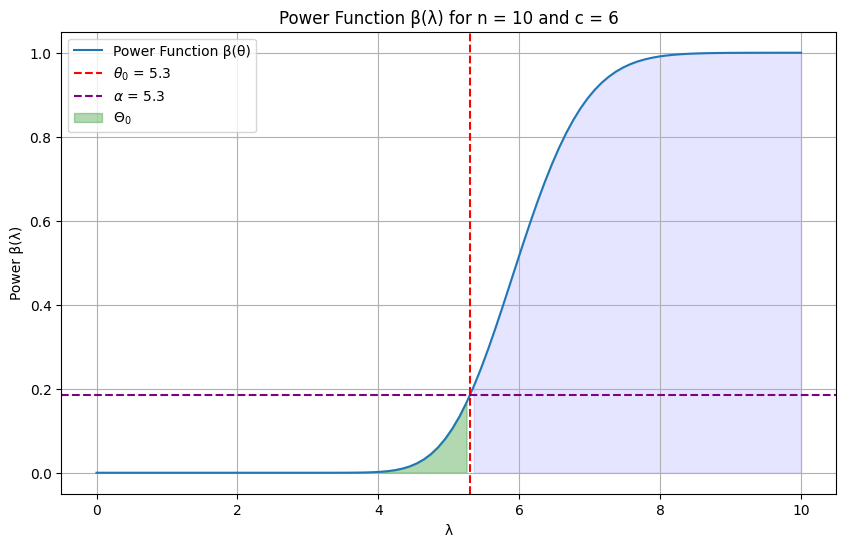

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Function to calculate the power function β(λ)
def BetaFun(lambda_val, c, n):
    # Using the survival function: 1 - CDF(np.ceil(n * c - 1))
    power = 1 - poisson.cdf(np.ceil(n * c - 1), n * lambda_val)
    return power

# Function to plot the power function
def plotBeta(cc, n=10, theta=5.3):
    # Generate a range of λ values from 0 to 10
    lambda_grid = np.linspace(0, 10, 100)
    # Calculate the power function values for each λ
    beta_values = [BetaFun(lam, cc, n) for lam in lambda_grid]
    
    # Calculate α (Type I error rate) as the probability under H_0 (λ ≤ θ)
    alpha = 1 - poisson.cdf(np.ceil(n * cc - 1), n * theta)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(lambda_grid, beta_values, label='Power Function β(θ)')
    plt.axvline(x=theta, color='red', linestyle='--', label=f"$\\theta_0$ = {theta}")
    plt.axhline(y=alpha, color='purple', linestyle='--', label=f"$\\alpha$ = {theta}")
    plt.title(f'Power Function β(λ) for n = {n} and c = {cc}')
    plt.xlabel('λ')
    plt.ylabel('Power β(λ)')
    
    plt.grid(True)
    
    # Fill the area where λ ≤ θ to indicate α region
    plt.fill_between(lambda_grid, 0, beta_values, where=(lambda_grid <= theta), 
                     alpha=0.3, color='green', label='$\\Theta_0$')
    
    # Fill the area where λ > θ to indicate power increase
    plt.fill_between(lambda_grid, 0, beta_values, where=(lambda_grid > theta), 
                     alpha=0.1, color='blue')
    plt.legend()
    plt.show()

# Call the function to plot the power function with c = 6
if __name__ == "__main__":
    plotBeta(cc=6)

## Power of a test - sample size calculations
- In applied stats courses we often talk about the power of a test at aparticular $\theta$ value in $\Theta_0^c$

Example:
- Let $X_1,...,X_n$ be a random sample from $N(\mu,\sigma^2)$
- The level $\alpha$ z-test for $H_0:\mu\leq\mu_0$ vs. $H_1:\mu>\mu_0$ rejects $H_0$ if

    $Z_0=\frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}>z_\alpha=c^*$

    $\begin{aligned}
    \beta(\mu)
    &=P_\mu(\mathbf{X}\in R)\\
    &=P_\mu(\frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}>z_\alpha)\\
    &=P_\mu(\frac{\bar{X}-\mu+\mu-\mu_0}{\sigma/\sqrt{n}}>z_\alpha)\\
    &=P_\mu(\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}>z_\alpha+\frac{\mu_0-\mu}{\sigma/\sqrt{n}})\\
    &=1-\Phi(z_\alpha+\frac{\mu_0-\mu}{\sigma/\sqrt{n}})
    \end{aligned}$


- Can calculate the power for $\mu=\mu_0+\delta$

    $\beta(\mu_0+\delta)=P(Z_0>z_\alpha|\mu=\mu_0+\delta)=1-\Phi(z_\alpha-\frac{\delta}{\sigma/\sqrt{n}})$

    and can choose $n$ to get desired power at a particular value of $\mu\in(\mu_0,\infty)$


## Most powerful tests

**Def: Uniformly most powerful**

Let $C$ be a class of tests for testing $H_0:\theta\in\Theta_0$ vs. $H_1:\theta\in\Theta_0^c$.

A test $\delta\in C$ is a uniformly most powerful (UMP) class $C$ test if for any other $\delta^*\in C$ we have

$\beta_\delta(\theta)\geq\beta_{\delta^*}(\theta)\quad\forall\theta\in\Theta_0^c$

- Focus on the class $C=$ all level $\alpha$ tests.
- UMP is a very strong requirement and does not exists in many realistic problems.

## UMP overview
- **Neyman-Pearson Lemma** - strong result for a limited case
    - Gives a level $\alpha$ UMP test for *simple hypothesis*

        $H_0:\theta=\theta_0$ vs. $H_1:\theta=\theta_1$
    - Gives both necessary and sufficient conditions
    - Can be used to prove results for *composite hypothesis*
- Karlin-Rubin Theorem - strong result for another limited case
    - Gives a level $\alpha$ UMP test for one-sided hypothesis

        $H_0:\theta\leq\theta_0$ vs. $H_1:\theta\geq\theta_0$
    - Requires a *monotone likelihood ratio* family for the test statistic
    - More pratical than the Neyman-Person

## Theorem: Neyman-Pearson Lemma

Consider hypothesis $H_0:\theta=\theta_0$ vs. $H_1:\theta=\theta_1$ and a test procedure with rejection region $R$ where
1. for some $k\geq 0$ we have

    $\mathbf{x}\in R$ if $f(\mathbf{x}|\theta_1)>k f(\mathbf{x}|\theta_0)$

    and $\mathbf{x}\in R^c$ if $f(\mathbf{x}|\theta_1)<k f(\mathbf{x}|\theta_0)$
2. and $\alpha=P_{\theta_0}(\mathbf{X}\in R)=\beta(\theta_0)$

Then

- (Sufficiency) Any test that satisfies **1** and **2** is a UMP level $\alpha$ test
- (Necessity) If there exists a test that satisfies **1** and **2** with $k>0$ then
    - every UMP level $\alpha$ test is a size $\alpha$ test, and
    - every UMP level $\alpha$ satisfies $1$ except perhaps on a set $A$ where

        $P_{\theta_0}(\mathbf{X}\in A)=P_{\theta_1}(\mathbf{X}\in A)=0$ 

## Neyman-Pearson Lemma

- Simple hypothesis: $\Theta_0$ (or $\Theta_0^c$) contains exactly one point
- Composite hypothesis: $\Theta_0$ (or $\Theta_0^c$) contains more than one point
- To use the Neyman-Pearson Lemma we proceed as follows:
    - Find the joint distribution of $X_1,X_2,...,X_n$
    - Express the ratio $\frac{f(\mathbf{x}|\theta_1)}{f(\mathbf{x}|\theta_0)}>k$ interms of a statistic
    - Choose $k$ such that it is a level $\alpha$ test
    then by Neyman-Pearson we have a UMP level $\alpha$ test
- By factorization theorem $\frac{f(\mathbf{x}|\theta_1)}{f(\mathbf{x}|\theta_0)}$ should be a function of a sufficient statistics.
    - By *Grok results:*
        - The likelihood ratio can often be factored as $g(T(\mathbf{x}), \theta_1, \theta_0) \cdot h(\mathbf{x})$, where $T(\mathbf{x})$ is the sufficient statistic.
        - This ensures that the UMP test relies on the optimal statistical information, simplifying the computation.    



## Neyman-Pearson for sufficient statistic

**Corollary**

Consider hypothesis $H_0:\theta=\theta_0$ vs. $H_1:\theta=\theta_1$.

Suppose $T$ is a sufficient statistic for $\theta$ with pdf or pmf $g(t|\theta_i)$ corresponding to $\theta_i,i=0,1.$

Then any test based on $T$ with rejection region $S$ is a UMP level $\alpha$ test if it satisfies

1. for some $k\geq 0$ we have

    $t\in S$ if $g(t|\theta_1) > k g(t|\theta_0)$

    and $t\in S^c$ if $g(t|\theta_1) < k g(t|\theta_0)$
2. and $\alpha=P_{\theta_0}(T\in S)$

$\to$ Can work with pdf of the test statistic instead of the joint pdf.


### Notes on the NP lemma (connection with the LRT)
- Neyman-Pearson: Reject if

    $\frac{f(\mathbf{x}|\theta_1)}{f(\mathbf{x}|\theta_2)}$ for some $k\geq 0$

    Note that $\theta_0$ is in the denominator
- The LRT rejects if

    $\begin{aligned}
    \lambda(\mathbf{x})
    &=\frac{\sup_{\theta\in\Theta_0}L(\theta|\mathbf{x})}{\sup_{\theta\in\Theta}L(\theta|\mathbf{x})}\leq c\quad\text{for some } c\in[0,1]\\
    &=\frac{f(\mathbf{x}|\theta_0)}{\max\{f(\mathbf{x}|\theta_0),f(\mathbf{x}|\theta_1)\}}=
                \begin{cases}
                &1\quad&\text{if }f(\mathbf{x}|\theta_0)>f(\mathbf{x}|\theta_1)\\
                &\frac{f(\mathbf{x}|\theta_0)}{f(\mathbf{x}|\theta_1)}\quad&\text{Otherwise}
                \end{cases}
    \end{aligned}$

    Here $\theta_0$ is in the numerator.

### Notes on the NP lemma (Role of $k$)
- Neyman-Pearson: Reject if

    $f(\mathbf{x}|\theta_1)>k f(\mathbf{x}|\theta_0)\quad\text{for some }k\geq 0$
- Why not just pick the $\theta$ value that gives the larger likelihhod?
    - That is, reject if $f(\mathbf{x}|\theta_1)>f(\mathbf{x}|\theta_0)\quad(k=1)$
- Want to control $\beta(\theta_0)=$ probability of Type I error
- $\alpha$ determines the $k$

### Example
- Let $X_1,...,X_n$ be a random sample form $N(\theta,1)$
- Find the size $\alpha$ UMP for testing $H_0:\theta=\theta_0$ vs. $H_1:\theta=\theta_1$

    Know that: $\bar{X}\sim N(\theta,1/n)$ and $T=\bar{X}$ is a sufficient statistic for $\theta$.

    By NP: UMP test for $H_0:\theta=\theta_0$ vs. $H_1:\theta=\theta_1$, reject if 

    $\frac{g(t|\theta_1)}{g(t|\theta_0)}>k$

    $\frac{\frac{1}{\sqrt{2\pi\cdot 1/\sqrt{n}}}\exp(-\frac{(t-\theta_1)^2}{2/n})}{\frac{1}{\sqrt{2\pi\cdot 1/\sqrt{n}}}\exp(-\frac{(t-\theta_0)^2}{2/n})}>k$

    $\exp(n(\theta_1-\theta_0)t+\frac{n}{2}(\theta_0^2-\theta_1^2))>k$

    $n(\theta_1-\theta_0)t+\frac{n}{2}(\theta_0^2-\theta_1^2)>\ln k$

    $n(\theta_1-\theta_0)t>\ln k+\frac{n}{2}(\theta_1^2-\theta_0^2)$

    if $\theta_1>\theta_0$
    
    $\bar{X}=t>\frac{\ln k}{n(\theta_1-\theta_0)}+\frac{1}{2}(\theta_1+\theta_0)=k^*$

    if $\theta_1<\theta_0$

    $\bar{X}=t<\frac{\ln k}{n(\theta_1-\theta_0)}+\frac{1}{2}(\theta_1+\theta_0)=k^*$

    Results: By NP Lemma, the UMP level $\alpha$ test: 
    
    Reject if: $t>k^*\quad(\theta_1>\theta_0)$, where

    $\begin{aligned}
    \alpha 
    &= \beta(\theta_0)= P_{\theta_0}(T=t>k^*)\\
    &=P(Z>\frac{k^*-\theta_0}{1/\sqrt{n}})\\
    &=1-\Phi(\frac{k^*-\theta_0}{1/\sqrt{n}})
    \end{aligned}$

    $\frac{k^*-\theta_0}{1/\sqrt{n}}=z_\alpha$

    $k^*=\theta_0+\frac{z_\alpha}{\sqrt{n}}$

    Reject if: $t<k^*\quad(\theta_1<\theta_0)$, where

    $\begin{aligned}
    \alpha 
    &= \beta(\theta_0)= P_{\theta_0}(T=t<k^*)\\
    &=P(Z<\frac{k^*-\theta_0}{1/\sqrt{n}})\\
    &=\Phi(\frac{k^*-\theta_0}{1/\sqrt{n}})
    \end{aligned}$

    $\frac{k^*-\theta_0}{1/\sqrt{n}}=-z_\alpha$

    $k^*=\theta_0-\frac{z_\alpha}{\sqrt{n}}$

    



#### About $Z_\alpha$
| **Quantity**      | **Definition**                | **Relationship with $\Phi$**         | **Example ($\alpha = 0.05$)** |
|---------------------|-------------------------------|---------------------------------------|-------------------------------|
| $Z_\alpha$       | $P(Z > Z_\alpha) = \alpha$  | $\Phi(Z_\alpha) = 1 - \alpha$       | $Z_{0.05} \approx 1.645$, $\Phi(1.645) \approx 0.95$ |
| $Z_{1-\alpha}$   | $P(Z \leq Z_{1-\alpha}) = \alpha$ | $\Phi(Z_{1-\alpha}) = \alpha$ | $Z_{0.95} \approx -1.645$, $\Phi(-1.645) \approx 0.05$ |
| $Z_{1-\alpha/2}$ | $P(Z \leq Z_{1-\alpha/2}) = 1 - \alpha/2$ | $\Phi(Z_{1-\alpha/2}) = 1 - \alpha/2$ | $Z_{0.975} \approx 1.96$, $\Phi(1.96) \approx 0.975$ |
| $-Z_\alpha$      | $P(Z < -Z_\alpha) = \alpha$ | $\Phi(-Z_\alpha) = \alpha$          | $-Z_{0.05} \approx -1.645$, $\Phi(-1.645) \approx 0.05$ |


### Example
- Let $X_1,...,X_n$ be a random sample form $Poisson(\theta)$
- Find the size $\alpha$ UMP for testing $H_0:\theta=\theta_0$ vs. $H_1:\theta=\theta_1$

    Sufficient statistic $T=\sum_{i=1}^n X_i\sim Poisson(n\theta)$

    By NP, the level $\alpha$ UMP for testing $H_0:\theta=\theta_0$ vs. $H_1:\theta=\theta_1$

    Reject if:

    $\frac{g(t|\theta_1)}{g(t|\theta_0)}>k$

    $\frac{e^{-(n\theta_1)}(n\theta_1)^t\frac{1}{t!}}{e^{-(n\theta_0)}(n\theta_0)^t\frac{1}{t!}}>k$

    $e^{-n(\theta_1-\theta_0)}(\frac{\theta_1}{\theta_0})^t>k$

    $n(\theta_0-\theta_1)+t\ln \frac{\theta_1}{\theta_0}>\ln k$

    If $\theta_1>\theta_0$,

    $t>\frac{\ln k + n(\theta_1-\theta_0)}{\ln(\frac{\theta_1}{\theta_0})}=k^*$

    $P_{\theta_0}(T\leq k^*)=\sum_{t=0}^{\lfloor k^*\rfloor}\frac{e^{-n\theta_0}(n\theta_0)^t}{t!}$

    $\begin{aligned}
    \alpha
    &=\beta(\theta_0)=P_{\theta_0}(T=t>k^*) \\
    &=1-P_{\theta_0}(T=t\leq k^*)\\
    &=1-\sum_{t=0}^{\lfloor k^* \rfloor }\frac{e^{-n\theta_0}(n\theta_0)^t}{t!}
    \end{aligned}$

    usually can't find a $k^*$ that makes this equal to $\alpha$, and jut find $k^*$ that makes this less than $\alpha$.

    Due to the discrete nature of the Poisson distribution, the probability $P_{\theta_0}(T > k^*)$ will jump in discrete steps. It’s rare to find a $k^*$ that yields exactly $\alpha$, **so the practice is to select the largest $c = \lfloor k^* \rfloor$ (or adjust $c$) such that $P_{\theta_0}(T > c) \leq \alpha$**. This conservative approach ensures the Type I error is controlled, though it may result in a test with size slightly less than $\alpha$. Randomization can be used to fine-tune the size to exactly $\alpha$ if required, but in practice, the integer $c$ is often sufficient.


    Set $c=\lfloor k^* \rfloor $

    If $\theta_1<\theta_0$,

    $t<\frac{\ln k + n(\theta_1-\theta_0)}{\ln(\frac{\theta_1}{\theta_0})}=k^*$

    $\begin{aligned}
    \alpha
    &=\beta(\theta_0)=P_{\theta_0}(T=t<k^*) \\
    &=\sum_{k=0}^{\lfloor k^*-1 \rfloor }\frac{e^{-n\theta_0}(n\theta_0)^k}{k!}
    \end{aligned}$

    **so the practice is to select the largest $c = \lfloor k^*-1 \rfloor$ (or adjust $c$) such that $P_{\theta_0}(T \leq c) \leq \alpha$**.

## Monotone likelihood ratio families
- Plan: use Neyman-Pearson Lemma to get results for **composite hypothesis**
- First: define monotone likelihood ratio

**Def: MLR**

A family of pdfs/pmfs $\{g(t|\theta:\theta\in\Theta)\}$ for a univariate random variable $T$ and real-valued parameter $\theta$ has a monotone likelihood ratio (MLR) if for every $\theta_2>\theta_1$ the ratio

$LR(t)=\frac{g(t|\theta_2)}{g(t|\theta_1)}$

is a monotone function of $t$ on $\{t:g(t|\theta_1)>0\text{ or }g(t|\theta_2)>0\}$
- Many common familites of distributions have an MLR

### Example
- Show that the normal family and the Poisson family have an MLR

    Let $T\sim N(\theta,\sigma^2), \sigma^2$ known, $\theta_2>\theta_1$

    $\begin{aligned}
    LR(t)
    &=\frac{g(t|\theta_2)}{g(t|\theta_1)}\\
    &=\frac{\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{(t-\theta_2)^2}{2\sigma^2})}{\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{(t-\theta_1)^2}{2\sigma^2})}\\
    &=\exp(-\frac{1}{2\sigma^2}(\theta_2^2-\theta_1^2))\exp(\frac{t}{\sigma^2}(\theta_2-\theta_1))
    \end{aligned}$

    - The first term: $\exp(-\frac{1}{2\sigma^2}(\theta_2^2-\theta_1^2))$ is a constant without $t$
    - The second term: $\exp(\frac{t}{\sigma^2}(\theta_2-\theta_1))$ is a monotone increasing function of $t$

    As $t$ increases, $LR(t)$ increases.

    Therefore, the Normal distribution family has a MLR.
    
    Let $T\sim Poisson(\theta),\theta_2>\theta_1$

    $\begin{aligned}
    LR(t)
    &=\frac{g(t|\theta_2)}{g(t|\theta_1)}\\  
    &=\frac{e^{-\theta_2}\theta_2^t\frac{1}{t!}}{e^{-\theta_1}\theta_1^t\frac{1}{t!}}\\  
    &=e^{\theta_1-\theta_2}(\frac{\theta_2}{\theta_1})^t
    \end{aligned}$

    - The first term: $e^{\theta_1-\theta_2}$ is a constant
    - The second term: $(\frac{\theta_2}{\theta_1})^t$ is monotone increasing function of $t$, where $\frac{\theta_2}{\theta_1}>1$

    As $t$ increases, $LR(t)$ increases.

    Therefore, the Poisson family has a MLR.
